In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml("mnist_784", version=1, return_X_y=True)
pixel_values, targets = data

In [3]:
pixel_values.shape

(70000, 784)

In [4]:
targets.shape

(70000,)

In [7]:
targets = targets.astype(int)

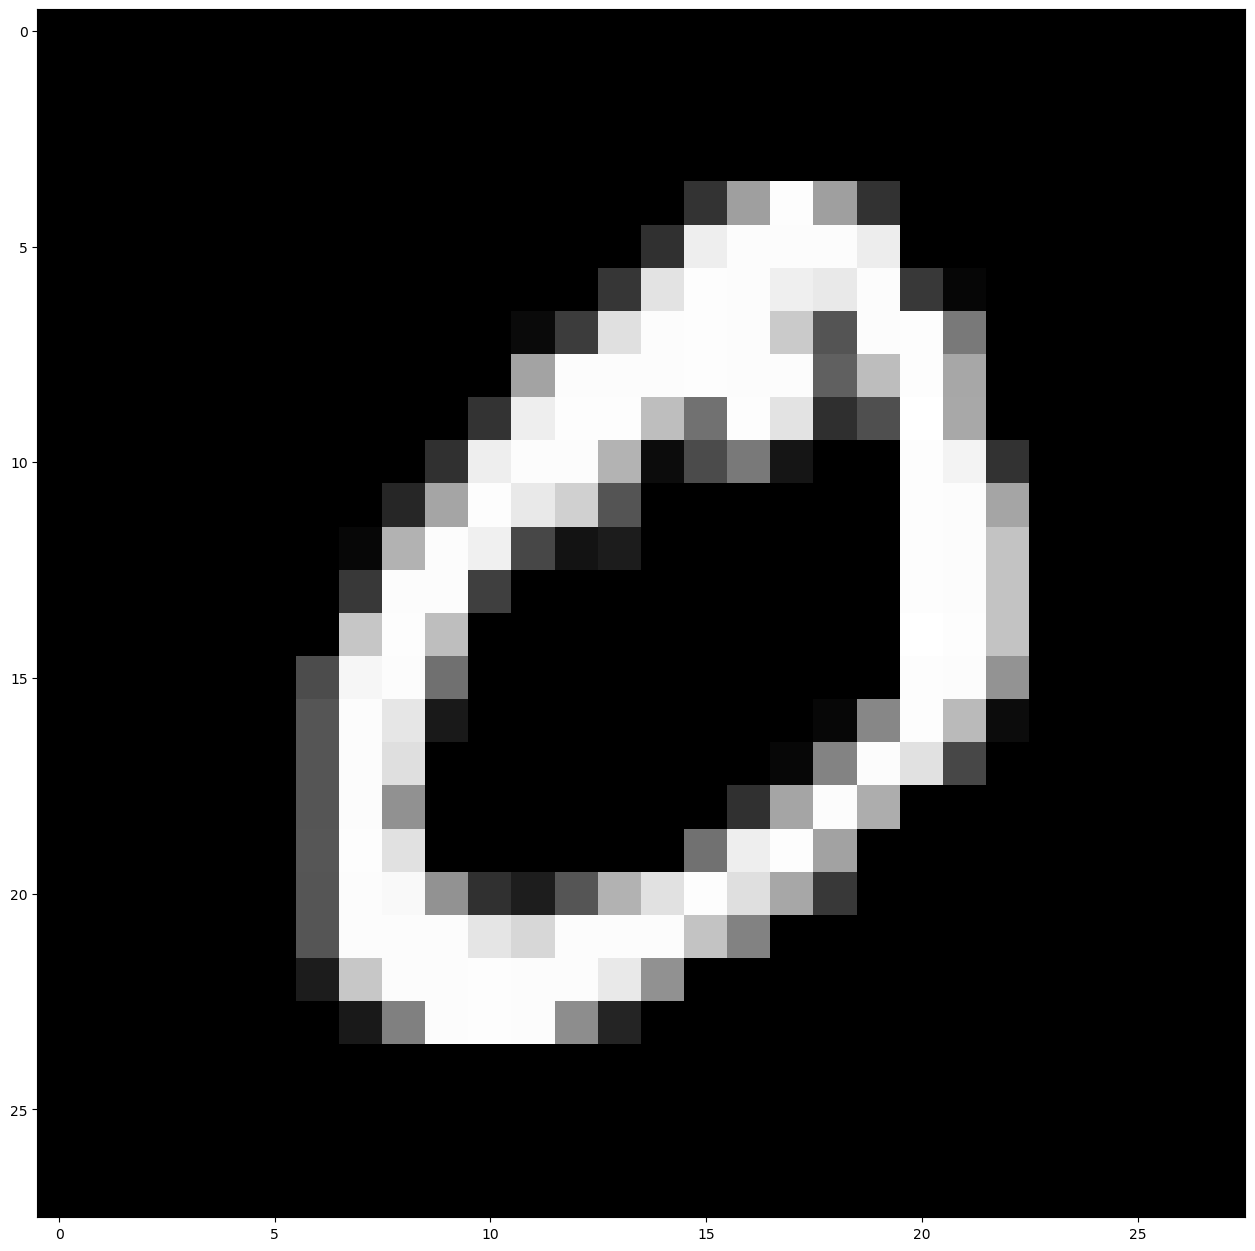

In [8]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [9]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

In [13]:
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [14]:
tsne_df.head()

,x,y,targets
0,-9.742266,-28.548525,5
1,-25.476608,-66.111008,0
2,-39.992714,32.707321,4
3,46.730042,29.864080,1
4,-14.279590,30.505270,9


/Users/tomfujii/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


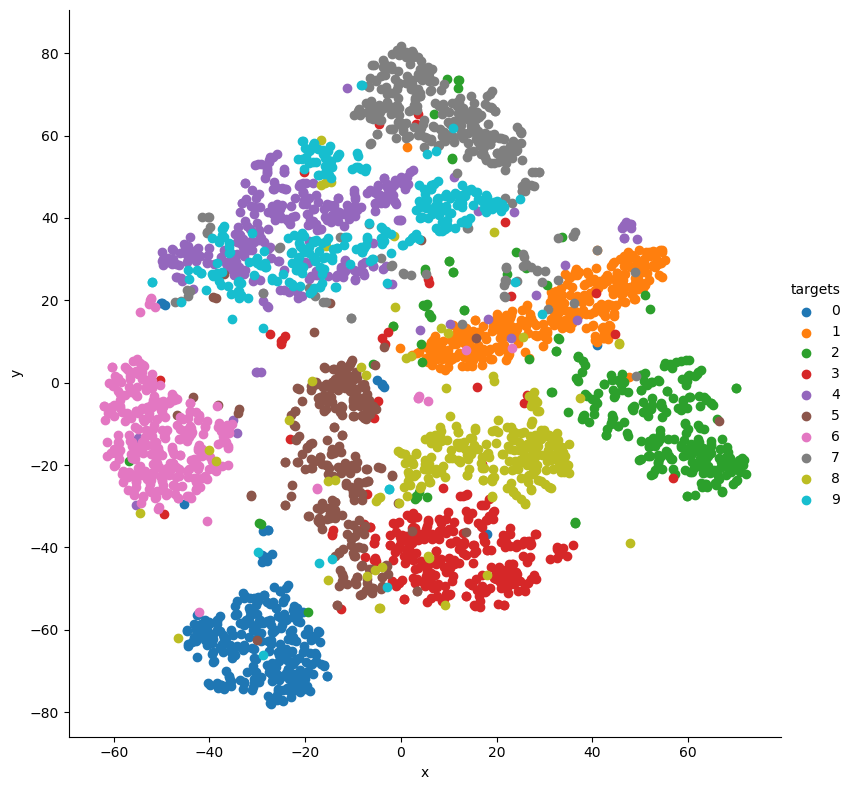

In [15]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [ ]:
import pandas as pd

df = pd.read_csv("wine")